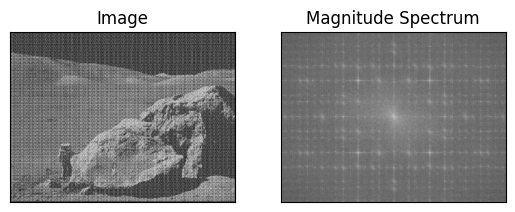

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]) + 1)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

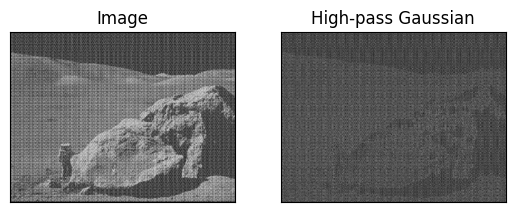

In [2]:
# 1) Высокочастотная фильтрация на основе ядра Гаусса
rows, cols = img.shape
cy, cx = rows//2, cols//2

y, x = np.ogrid[-cy:rows-cy, -cx:cols-cx]

lowpass = np.exp(-(x*x + y*y) / (2*(40)**2))

mask = 1 - lowpass
mask = mask[:, :, np.newaxis]          

dft_shift = dft_shift * mask           

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('High-pass Gaussian'), plt.xticks([]), plt.yticks([])
plt.show()

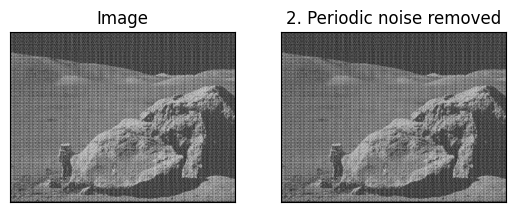

In [3]:
# 2) Удаление периодического шума
dft_shift = np.fft.fftshift(cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT))

mask = np.ones((rows, cols, 2), dtype=np.float32)

peaks = [
    (cy - 83, cx - 107),
    (cy - 83, cx + 107),
    (cy + 83, cx - 107),
    (cy + 83, cx + 107)
]

for py, px in peaks:
    cv.circle(mask, (px, py), 13, (0, 0), -1)

dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('2. Periodic noise removed'), plt.xticks([]), plt.yticks([])
plt.show()